# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from math import sqrt

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
!pip install citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

#A: Number of cities in the list: 623

Number of cities in the list: 607


In [4]:
cities

['adamstown',
 'luderitz',
 'college',
 'uturoa',
 'kuyucak',
 'freetown',
 "nar'yan-mar",
 'blackmans bay',
 'arraial do cabo',
 'shimoda',
 'longyearbyen',
 'aleg',
 'bubaque',
 'mudhol',
 'hadibu',
 'invercargill',
 'road town',
 'mar del plata',
 'badger',
 'waitangi',
 "ust'-ilimsk",
 'flying fish cove',
 'jiuquan',
 'edinburgh of the seven seas',
 'kiffa',
 'hithadhoo',
 'hovd',
 'puerto aysen',
 'kirensk',
 'iskateley',
 'bandrele',
 'villa angela',
 'port-aux-francais',
 'stanley',
 'yuzhno-kurilsk',
 'lokken',
 'bethel',
 'port elizabeth',
 'vorgashor',
 'xindian',
 'bilibino',
 'richards bay',
 'koksovyy',
 'haiku-pauwela',
 'iqaluit',
 'whitehorse',
 'petropavlovsk-kamchatsky',
 'west island',
 'albany',
 'costa teguise',
 'ilulissat',
 'grytviken',
 'kingston',
 'strezhevoy',
 'callao',
 'anadyr',
 'santa rosa de lima',
 'tateyama',
 'san juan de miraflores',
 'cootamundra',
 'naila',
 'jamestown',
 'punta arenas',
 'santiago de cao',
 'al mutayrifi',
 'rongelap',
 'puerto 

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | luderitz
Processing Record 3 of Set 1 | college
Processing Record 4 of Set 1 | uturoa
Processing Record 5 of Set 1 | kuyucak
Processing Record 6 of Set 1 | freetown
Processing Record 7 of Set 1 | nar'yan-mar
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | arraial do cabo
Processing Record 10 of Set 1 | shimoda
Processing Record 11 of Set 1 | longyearbyen
Processing Record 12 of Set 1 | aleg
Processing Record 13 of Set 1 | bubaque
Processing Record 14 of Set 1 | mudhol
Processing Record 15 of Set 1 | hadibu
Processing Record 16 of Set 1 | invercargill
Processing Record 17 of Set 1 | road town
Processing Record 18 of Set 1 | mar del plata
Processing Record 19 of Set 1 | badger
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | ust'-ilimsk
Processing Record 22 of Set 1 | flying fish cove
Processing Record 23 o

Processing Record 40 of Set 4 | kiunga
Processing Record 41 of Set 4 | belmonte
Processing Record 42 of Set 4 | atafu village
Processing Record 43 of Set 4 | rio grande
Processing Record 44 of Set 4 | aasiaat
Processing Record 45 of Set 4 | licheng
Processing Record 46 of Set 4 | tiksi
Processing Record 47 of Set 4 | mersing
Processing Record 48 of Set 4 | isafjordur
Processing Record 49 of Set 4 | afaahiti
Processing Record 0 of Set 5 | odemira
Processing Record 1 of Set 5 | swift current
Processing Record 2 of Set 5 | khanty-mansiysk
Processing Record 3 of Set 5 | kuytun
Processing Record 4 of Set 5 | aras-asan
Processing Record 5 of Set 5 | tazovsky
Processing Record 6 of Set 5 | severo-yeniseyskiy
Processing Record 7 of Set 5 | coahuayana de hidalgo
Processing Record 8 of Set 5 | hami
Processing Record 9 of Set 5 | grand falls-windsor
Processing Record 10 of Set 5 | constantia
Processing Record 11 of Set 5 | nijar
Processing Record 12 of Set 5 | mugia
Processing Record 13 of Set 5 

Processing Record 32 of Set 8 | bang saphan
Processing Record 33 of Set 8 | dolores
Processing Record 34 of Set 8 | dzhetygara
Processing Record 35 of Set 8 | remire-montjoly
Processing Record 36 of Set 8 | mukah
City not found. Skipping...
Processing Record 37 of Set 8 | chachapoyas
Processing Record 38 of Set 8 | ichinoseki
Processing Record 39 of Set 8 | egilsstadir
Processing Record 40 of Set 8 | rosso
Processing Record 41 of Set 8 | altay
Processing Record 42 of Set 8 | maputo
Processing Record 43 of Set 8 | bar-sur-aube
Processing Record 44 of Set 8 | fortaleza
Processing Record 45 of Set 8 | kristiansund
Processing Record 46 of Set 8 | luau
Processing Record 47 of Set 8 | yerofey pavlovich
Processing Record 48 of Set 8 | maracaibo
Processing Record 49 of Set 8 | bol
Processing Record 0 of Set 9 | northam
Processing Record 1 of Set 9 | novovarshavka
Processing Record 2 of Set 9 | ceerigaabo
Processing Record 3 of Set 9 | opuwo
Processing Record 4 of Set 9 | galle
Processing Recor

Processing Record 20 of Set 12 | tibati
Processing Record 21 of Set 12 | seogwipo
City not found. Skipping...
Processing Record 22 of Set 12 | cadale
Processing Record 23 of Set 12 | baganga
Processing Record 24 of Set 12 | chui
Processing Record 25 of Set 12 | gunjur
Processing Record 26 of Set 12 | yarmouth
Processing Record 27 of Set 12 | winslow
Processing Record 28 of Set 12 | vernon
Processing Record 29 of Set 12 | igarka
Processing Record 30 of Set 12 | atherton
Processing Record 31 of Set 12 | batu pahat
Processing Record 32 of Set 12 | cromwell
Processing Record 33 of Set 12 | slave lake
Processing Record 34 of Set 12 | kapoeta
Processing Record 35 of Set 12 | burang
Processing Record 36 of Set 12 | yunak
Processing Record 37 of Set 12 | sao gabriel da cachoeira
Processing Record 38 of Set 12 | salinopolis
Processing Record 39 of Set 12 | mariental
Processing Record 40 of Set 12 | colares
Processing Record 41 of Set 12 | kudahuvadhoo
Processing Record 42 of Set 12 | tambura
Pr

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,22.88,77,100,4.87,PN,1699150162
1,luderitz,-26.6481,15.1594,14.24,85,18,4.92,NA,1699150162
2,college,64.8569,-147.8028,-5.03,65,100,5.14,US,1699150162
3,uturoa,-16.7333,-151.4333,25.41,84,90,7.99,PF,1699150163
4,kuyucak,37.9133,28.4592,17.35,93,58,1.52,TR,1699150163


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,22.88,77,100,4.87,PN,1699150162
1,luderitz,-26.6481,15.1594,14.24,85,18,4.92,NaN,1699150162
2,college,64.8569,-147.8028,-5.03,65,100,5.14,US,1699150162
3,uturoa,-16.7333,-151.4333,25.41,84,90,7.99,PF,1699150163
4,kuyucak,37.9133,28.4592,17.35,93,58,1.52,TR,1699150163


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

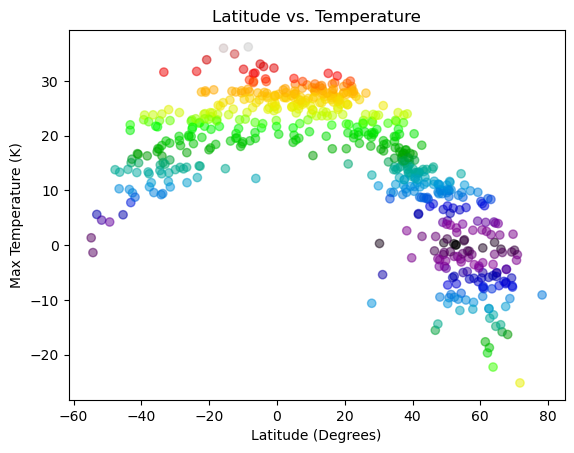

In [18]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties

#create the colors
colors = [sqrt(temp*temp) for temp in city_data_df['Max Temp']]

# Create a scatter plot & generate the latitude vs. temperature for the x and y coordinates
plt.scatter('Lat', 'Max Temp', alpha=.5, data=city_data_df, c=colors, cmap='nipy_spectral')

# Add labels and a title
plt.xlabel('Latitude (Degrees)')
plt.ylabel('Max Temperature (K)')
plt.title('Latitude vs. Temperature')

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

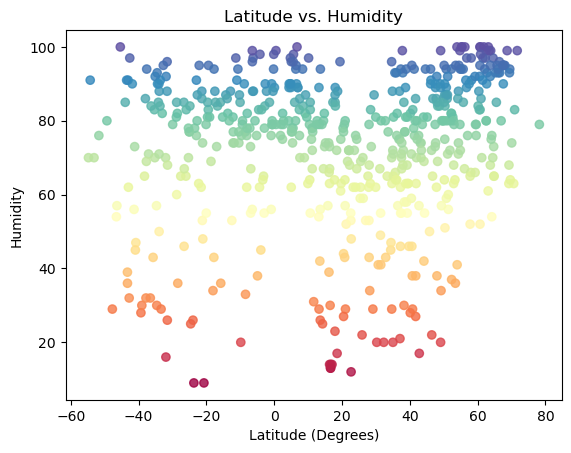

In [20]:
# Build the scatter plots for latitude vs. humidity
colors = [sqrt(datapoint*datapoint) for datapoint in city_data_df['Humidity']]

# Create a scatter plot & generate the latitude vs. temperature for the x and y coordinates
plt.scatter('Lat', 'Humidity', alpha=.8, data=city_data_df, c=colors, cmap='Spectral')

# Add labels and a title
plt.xlabel('Latitude (Degrees)')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

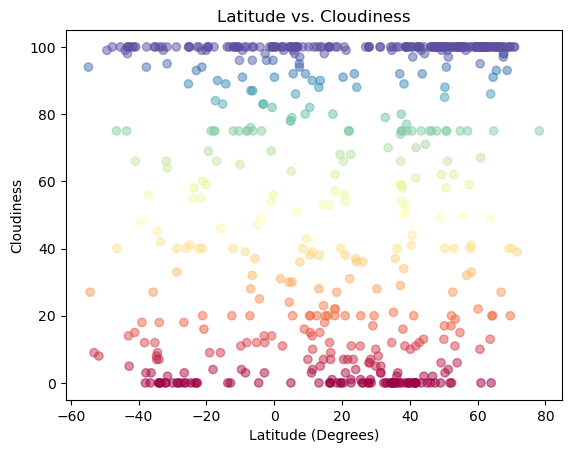

In [21]:
# Build the scatter plots for latitude vs. cloudiness
colors = [sqrt(datapoint*datapoint) for datapoint in city_data_df['Cloudiness']]

# Create a scatter plot & generate the latitude vs. temperature for the x and y coordinates
plt.scatter('Lat', 'Cloudiness', alpha=.5, data=city_data_df, c=colors, cmap='Spectral')

# Add labels and a title
plt.xlabel('Latitude (Degrees)')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

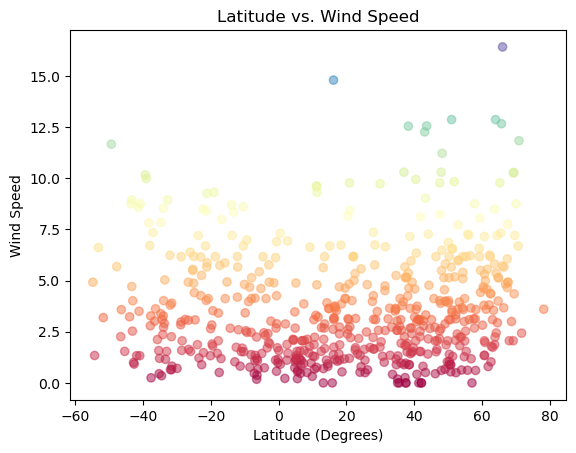

In [22]:
# Build the scatter plots for latitude vs. wind speed
colors = [sqrt(datapoint*datapoint) for datapoint in city_data_df['Wind Speed']]

# Create a scatter plot & generate the latitude vs. temperature for the x and y coordinates
plt.scatter('Lat', 'Wind Speed', alpha=.5, data=city_data_df, c=colors, cmap='Spectral')

# Add labels and a title
plt.xlabel('Latitude (Degrees)')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [26]:
# Define a function to create Linear Regression plots
def regress(x,y, xlabel, ylabel, coords) :
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values, "r-")
    plt.annotate(line_eq,(5.8,0.8),fontsize=14, color="red")
    plt.annotate(line_eq, coords, fontsize=14, color="red")
    plt.title(f'R: {rvalue}', loc='left')
    
    plt.xlabel(xlablel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()
    

In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0 ]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,college,64.8569,-147.8028,-5.03,65,100,5.14,US,1699150162
4,kuyucak,37.9133,28.4592,17.35,93,58,1.52,TR,1699150163
5,freetown,8.4840,-13.2299,26.43,84,100,2.13,SL,1699150163
6,nar'yan-mar,67.6713,53.0870,-4.38,95,98,4.92,RU,1699150163
9,shimoda,34.6667,138.9500,18.95,70,99,5.25,JP,1699150164


In [29]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,22.88,77,100,4.87,PN,1699150162
1,luderitz,-26.6481,15.1594,14.24,85,18,4.92,NaN,1699150162
3,uturoa,-16.7333,-151.4333,25.41,84,90,7.99,PF,1699150163
7,blackmans bay,-43.0167,147.3167,15.07,62,14,4.01,AU,1699150164
8,arraial do cabo,-22.9661,-42.0278,22.30,76,93,6.15,BR,1699150164


###  Temperature vs. Latitude Linear Regression Plot

NameError: name 'xlablel' is not defined

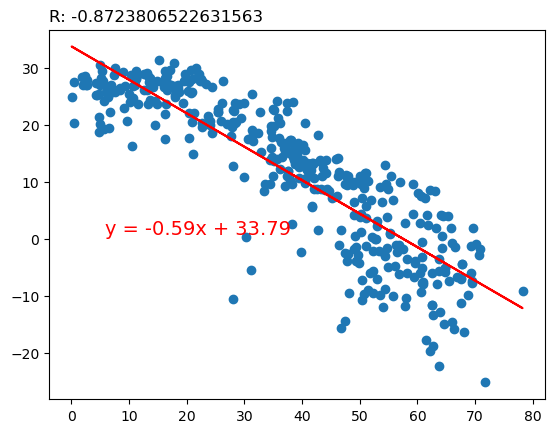

In [31]:
# Linear regression on Northern Hemisphere
regress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Temperature (Kelvin)', (0,270))




NameError: name 'xlablel' is not defined

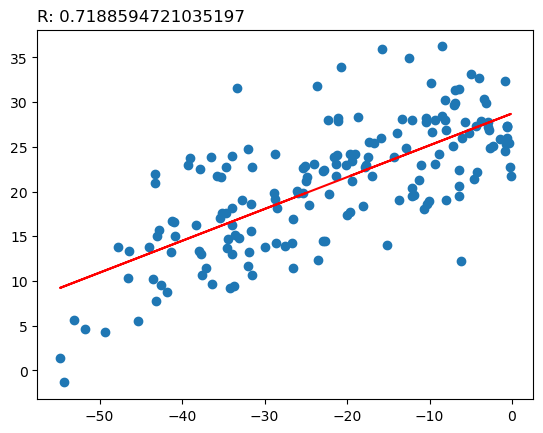

In [32]:
# Linear regression on Southern Hemisphere
regress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Temperature (Kelvin)', (-20,275))


**Discussion about the linear relationship:** Approaching the equator (latitude = 0), the temperature increases. There is a relationship between latitude & temperture as evidenced by the r values found in the top left corner. 

### Humidity vs. Latitude Linear Regression Plot

NameError: name 'xlablel' is not defined

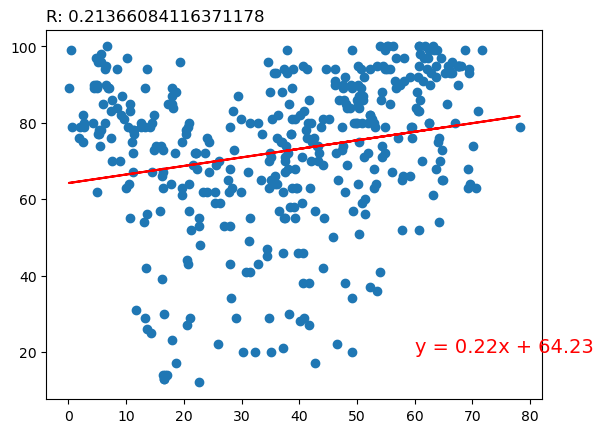

In [33]:
# Northern Hemisphere
regress(northern_hemi_df['Lat'],northern_hemi_df['Humidity'], 'Latitude', 'Humidity', (60,20))



NameError: name 'xlablel' is not defined

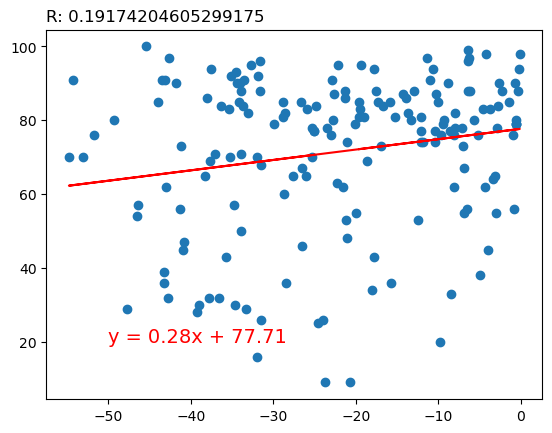

In [34]:
# Southern Hemisphere
regress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity', (-50,20))

**Discussion about the linear relationship:** There is no correlation between humidity & latitude. 

### Cloudiness vs. Latitude Linear Regression Plot

NameError: name 'xlablel' is not defined

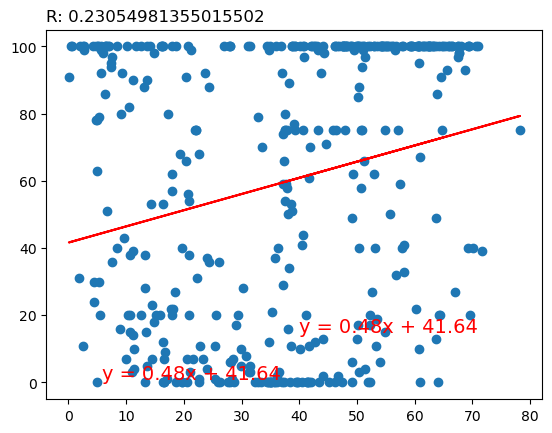

In [37]:
# Northern Hemisphere
regress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitiude', 'Cloudiness', (40,15))

NameError: name 'xlablel' is not defined

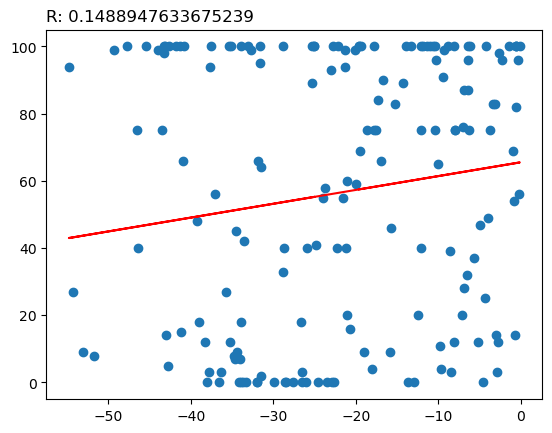

In [38]:
# Southern Hemisphere
regress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', (-60, 30))


**Discussion about the linear relationship:** There is no linear relationship between latitude & cloudiness. The variance of ranges the cities in both hemispheres are too large. 

### Wind Speed vs. Latitude Linear Regression Plot

NameError: name 'xlablel' is not defined

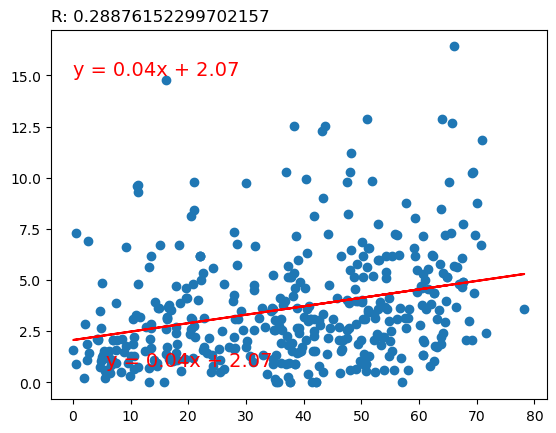

In [40]:
# Northern Hemisphere
regress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', (0,15))



NameError: name 'xlablel' is not defined

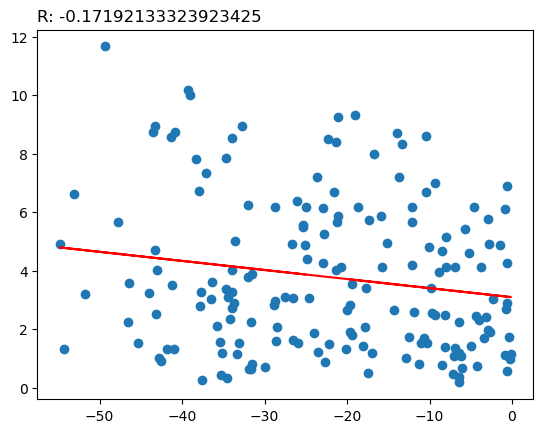

In [41]:
# Southern Hemisphere
regress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', (-60,30))


**Discussion about the linear relationship:** The linear relationship between wind speed & latitude is weak due to the r values being positive & negative values.